## 

- forecast median household income 
- forecast poverty relative to mean income 
- cluster household income development phase (Emerging Growth Phase, Pre-Development Era, Modern Urbanized Economy)

In [453]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [454]:
# national golden data 
# ======================
URL_DATA = './staging/gold/national_data_gold_data.parquet'
national_data = pd.read_parquet(URL_DATA)

national_data.tail(10)

,year,population_national,gdp_national(RM),gdp_national_per_capita(RM),Inflation(%),labour_force_national,employed_persons_national,unemployed_persons_national,outside_labour_force_national,unemployed_rate_national(%),participation_rate_national(%),income_mean_national(RM),income_median_national(RM),poverty_relative_national_median_income(%),gdp_national_growth_rate(%),gdp_national_per_capita_growth_rate(%),income_median_growth_rate(%),income_inequality(%)
46,2016,31633500,1.229312e+12,3.886100e+10,0.02,14667800,14163700,504100,6987600,0.03,0.68,6958.0,5228.0,0.16,0.04,0.03,0.07,0.25
47,2017,32022600,1.300769e+12,4.062000e+10,0.04,14980100,14476800,503300,7065000,0.03,0.68,7272.0,5443.0,0.16,0.06,0.05,0.04,0.25
48,2018,32382300,1.363766e+12,4.211500e+10,0.01,15280300,14776000,504300,7094400,0.03,0.68,7587.0,5658.0,0.17,0.05,0.04,0.04,0.25
49,2019,32523000,1.423952e+12,4.378300e+10,0.01,15581600,15073400,508200,7103500,0.03,0.69,7901.0,5873.0,0.17,0.04,0.04,0.04,0.26
50,2020,32447400,1.346249e+12,4.149000e+10,-0.01,15406000,14719400,686600,7105200,0.04,0.68,7089.0,5209.0,0.16,-0.05,-0.05,-0.11,0.27
51,2021,32576300,1.390882e+12,4.269615e+10,0.02,15532800,14825200,707600,7102300,0.05,0.69,7784.0,5774.0,0.16,0.03,0.03,0.11,0.26
52,2022,32698100,1.514139e+12,4.630660e+10,0.03,15769700,15155200,614500,7000700,0.04,0.69,8479.0,6338.0,0.17,0.09,0.08,0.10,0.25
53,2023,33401800,1.567974e+12,4.694273e+10,0.02,16028158,15402855,625302,7102102,0.04,0.69,8637.0,6457.0,0.17,0.04,0.01,0.02,0.25
54,2024,34052100,1.648163e+12,4.839174e+10,0.02,16286615,15650510,636105,7203505,0.04,0.70,8795.0,6575.0,0.17,0.05,0.03,0.02,0.25
55,2025,34231700,1.677320e+12,4.916245e+10,0.02,16545072,15898165,646908,7304908,0.04,0.70,8953.0,6694.0,0.17,0.02,0.02,0.02,0.25


## Forecast median household income (2026,2027,2028)

In [455]:
national_data_training = national_data[['year', 'income_median_national(RM)', 'gdp_national_per_capita(RM)', 'participation_rate_national(%)', 'unemployed_rate_national(%)', 'Inflation(%)']]

national_data_training.loc[len(national_data_training)] = [2026, 0, 0, 0, 0, 0]
national_data_training.loc[len(national_data_training)] = [2027, 0, 0, 0, 0, 0]
national_data_training.loc[len(national_data_training)] = [2028, 0, 0, 0, 0, 0]


national_data_training.tail(10)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2452\191035574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_data_training.loc[len(national_data_training)] = [2026, 0, 0, 0, 0, 0]
C:\Users\Acer\AppData\Local\Temp\ipykernel_2452\191035574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_data_training.loc[len(national_data_training)] = [2027, 0, 0, 0, 0, 0]
C:\Users\Acer\AppData\Local\Temp\ipykernel_2452\191035574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,year,income_median_national(RM),gdp_national_per_capita(RM),participation_rate_national(%),unemployed_rate_national(%),Inflation(%)
49,2019,5873.0,4.378300e+10,0.69,0.03,0.01
50,2020,5209.0,4.149000e+10,0.68,0.04,-0.01
51,2021,5774.0,4.269615e+10,0.69,0.05,0.02
52,2022,6338.0,4.630660e+10,0.69,0.04,0.03
53,2023,6457.0,4.694273e+10,0.69,0.04,0.02
54,2024,6575.0,4.839174e+10,0.70,0.04,0.02
55,2025,6694.0,4.916245e+10,0.70,0.04,0.02
56,2026,0.0,0.000000e+00,0.00,0.00,0.00
57,2027,0.0,0.000000e+00,0.00,0.00,0.00
58,2028,0.0,0.000000e+00,0.00,0.00,0.00


In [456]:
# extrapolate selected feature

# List of features to forecast
features_to_extend = [
    'gdp_national_per_capita(RM)',
    'participation_rate_national(%)',
    'unemployed_rate_national(%)',
    'Inflation(%)'
]

# Sort data by year
df = national_data_training.sort_values('year').reset_index(drop=True)

# Define future years to forecast
target_years = [2026, 2027, 2028]

# Loop through each feature to forecast its values
for feature in features_to_extend:
    # Keep only non-zero, non-null values
    clean = df[df[feature] != 0][['year', feature]].dropna()

    # Calculate average yearly change (slope)
    slope = (clean[feature].iloc[-1] - clean[feature].iloc[0]) / \
            (clean['year'].iloc[-1] - clean['year'].iloc[0])

    # Get last known value and year
    last_val = clean[feature].iloc[-1]
    last_year = clean['year'].iloc[-1]

    # Generate projected values for each target year
    for year in target_years:
        if year >= last_year + 1:
            value = last_val + slope * (year - last_year)

            # If the year already exists, only update if value is 0
            if year in df['year'].values:
                if df.loc[df['year'] == year, feature].values[0] == 0:
                    df.loc[df['year'] == year, feature] = value
            else:
                # Add new row if year doesn't exist
                df = pd.concat([
                    df,
                    pd.DataFrame([{'year': year, feature: value}])
                ], ignore_index=True)

# Final cleanup: sort by year and fill any remaining NaNs with 0
df = df.sort_values('year').reset_index(drop=True).fillna(0)
national_data_training=df
national_data_training.tail(10)


,year,income_median_national(RM),gdp_national_per_capita(RM),participation_rate_national(%),unemployed_rate_national(%),Inflation(%)
49,2019,5873.0,4.378300e+10,0.690000,0.030000,0.01
50,2020,5209.0,4.149000e+10,0.680000,0.040000,-0.01
51,2021,5774.0,4.269615e+10,0.690000,0.050000,0.02
52,2022,6338.0,4.630660e+10,0.690000,0.040000,0.03
53,2023,6457.0,4.694273e+10,0.690000,0.040000,0.02
54,2024,6575.0,4.839174e+10,0.700000,0.040000,0.02
55,2025,6694.0,4.916245e+10,0.700000,0.040000,0.02
56,2026,0.0,4.993316e+10,0.701163,0.040233,0.02
57,2027,0.0,5.070387e+10,0.702326,0.040465,0.02
58,2028,0.0,5.147458e+10,0.703488,0.040698,0.02


### Forecasting Median household Income

In [457]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Copy your full dataset (replace with your actual DataFrame name)
df = national_data_training.copy()

# Define features and target
features = ['gdp_national_per_capita(RM)', 'participation_rate_national(%)']

target = 'income_median_national(RM)'

# Split into train and predict sets
train_df = df[df['year'] <= 2025].copy()
predict_df = df[df['year'] > 2025].copy()

# Features and target for training
X_train = train_df[features]
y_train = train_df[target]

# Ensure prediction data exists and fill NA or 0 in prediction features
if not predict_df.empty:
    for col in features:
        # Fill zeros or missing with last known values from 2025
        last_value = train_df.iloc[-1][col]
        predict_df[col] = predict_df[col].replace(0, last_value).fillna(last_value)

    # Prepare input features for prediction
    X_predict = predict_df[features]

    # Train and predict
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_future = model.predict(X_predict)

    # Assign predictions
    predict_df[target] = y_pred_future

    # Update original DataFrame
    df.update(predict_df)

    # Evaluate training performance
    y_train_pred = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2 = r2_score(y_train, y_train_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Print forecast results
    print(df[df['year'] > 2025][['year', 'income_median_national(RM)']])
else:
    print("No future years found in dataset for forecasting.")


RMSE: 360.99
R² Score: 0.9685
    year  income_median_national(RM)
56  2026                 6614.922816
57  2027                 6748.556415
58  2028                 6882.190014


In [458]:
df_forecasted_median_income = df[["year", "income_median_national(RM)"]]
df_forecasted_median_income = df_forecasted_median_income[df_forecasted_median_income["year"] > 2025]
df_forecasted_median_income['income_median_national(RM)'] = df_forecasted_median_income['income_median_national(RM)'].round(0)
df_forecasted_median_income

,year,income_median_national(RM)
56,2026,6615.0
57,2027,6749.0
58,2028,6882.0


In [459]:
# Define new years
new_years = [2026, 2027, 2028]

# Create empty rows with 0 values
new_rows = pd.DataFrame({
    'year': new_years,
    'population_national': 0,
    'gdp_national(RM)': 0,
    'gdp_national_per_capita(RM)': 0,
    'Inflation(%)': 0,
    'labour_force_national': 0,
    'employed_persons_national': 0,
    'unemployed_persons_national': 0,
    'outside_labour_force_national': 0,
    'unemployed_rate_national(%)': 0,
    'participation_rate_national(%)': 0,
    'income_mean_national(RM)': 0,
    'income_median_national(RM)': 0,
    'poverty_relative_national_median_income(%)': 0,
    'gdp_national_growth_rate(%)': 0,
    'gdp_national_per_capita_growth_rate(%)': 0,
    'income_median_growth_rate(%)': 0,
    'income_inequality(%)': 0
})

# Append to your existing DataFrame
national_data_x = pd.concat([national_data, new_rows], ignore_index=True)

# Confirm
national_data_x.tail(10)


,year,population_national,gdp_national(RM),gdp_national_per_capita(RM),Inflation(%),labour_force_national,employed_persons_national,unemployed_persons_national,outside_labour_force_national,unemployed_rate_national(%),participation_rate_national(%),income_mean_national(RM),income_median_national(RM),poverty_relative_national_median_income(%),gdp_national_growth_rate(%),gdp_national_per_capita_growth_rate(%),income_median_growth_rate(%),income_inequality(%)
49,2019,32523000,1.423952e+12,4.378300e+10,0.01,15581600,15073400,508200,7103500,0.03,0.69,7901.0,5873.0,0.17,0.04,0.04,0.04,0.26
50,2020,32447400,1.346249e+12,4.149000e+10,-0.01,15406000,14719400,686600,7105200,0.04,0.68,7089.0,5209.0,0.16,-0.05,-0.05,-0.11,0.27
51,2021,32576300,1.390882e+12,4.269615e+10,0.02,15532800,14825200,707600,7102300,0.05,0.69,7784.0,5774.0,0.16,0.03,0.03,0.11,0.26
52,2022,32698100,1.514139e+12,4.630660e+10,0.03,15769700,15155200,614500,7000700,0.04,0.69,8479.0,6338.0,0.17,0.09,0.08,0.10,0.25
53,2023,33401800,1.567974e+12,4.694273e+10,0.02,16028158,15402855,625302,7102102,0.04,0.69,8637.0,6457.0,0.17,0.04,0.01,0.02,0.25
54,2024,34052100,1.648163e+12,4.839174e+10,0.02,16286615,15650510,636105,7203505,0.04,0.70,8795.0,6575.0,0.17,0.05,0.03,0.02,0.25
55,2025,34231700,1.677320e+12,4.916245e+10,0.02,16545072,15898165,646908,7304908,0.04,0.70,8953.0,6694.0,0.17,0.02,0.02,0.02,0.25
56,2026,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
57,2027,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
58,2028,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [460]:
# Step 1: Set index to year for easier updating
national_data_x.set_index("year", inplace=True)
df_forecasted_median_income.set_index("year", inplace=True)

# Step 2: Update the values for 2023-2025
national_data_x.update(df_forecasted_median_income)

# Step 3: Reset index if you want the year back as a column
national_data_x.reset_index(inplace=True)

national_data_x.tail(5)

,year,population_national,gdp_national(RM),gdp_national_per_capita(RM),Inflation(%),labour_force_national,employed_persons_national,unemployed_persons_national,outside_labour_force_national,unemployed_rate_national(%),participation_rate_national(%),income_mean_national(RM),income_median_national(RM),poverty_relative_national_median_income(%),gdp_national_growth_rate(%),gdp_national_per_capita_growth_rate(%),income_median_growth_rate(%),income_inequality(%)
54,2024,34052100,1.648163e+12,4.839174e+10,0.02,16286615,15650510,636105,7203505,0.04,0.7,8795.0,6575.0,0.17,0.05,0.03,0.02,0.25
55,2025,34231700,1.677320e+12,4.916245e+10,0.02,16545072,15898165,646908,7304908,0.04,0.7,8953.0,6694.0,0.17,0.02,0.02,0.02,0.25
56,2026,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.0,0.0,6615.0,0.00,0.00,0.00,0.00,0.00
57,2027,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.0,0.0,6749.0,0.00,0.00,0.00,0.00,0.00
58,2028,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.0,0.0,6882.0,0.00,0.00,0.00,0.00,0.00


## Forecasting Poverty Relative to Median income

In [461]:
selected_features_with_target = [
    'poverty_relative_national_median_income(%)',            
    'Inflation(%)',
    'income_inequality(%)',
]

selected_data_with_target = national_data[selected_features_with_target]

selected_data_with_target = selected_data_with_target[(selected_data_with_target != 0).all(axis=1)]

forecasting_data = national_data[["year", "poverty_relative_national_median_income(%)", "income_inequality(%)", "Inflation(%)"]]

forecasting_data = forecasting_data[forecasting_data['year'] >= 1995].reset_index(drop=True)
forecasting_data

,year,poverty_relative_national_median_income(%),income_inequality(%),Inflation(%)
0,1995,0.20,0.32,0.04
1,1996,0.20,0.33,0.04
2,1997,0.20,0.34,0.03
3,1998,0.19,0.32,0.05
4,1999,0.19,0.31,0.03
5,2000,0.19,0.31,0.02
6,2001,0.20,0.32,0.01
7,2002,0.20,0.32,0.02
8,2003,0.20,0.32,0.01
9,2004,0.20,0.32,0.01


In [462]:
# Define new years
new_years = [2026, 2027, 2028]

# Create empty rows with 0 values
new_rows = pd.DataFrame({
    'year': new_years,
    'poverty_relative_national_median_income(%)': 0,
    'income_inequality(%)': 0,
    'Inflation(%)': 0,
})

# Append to your existing DataFrame
training_data = pd.concat([forecasting_data, new_rows], ignore_index=True)
training_data = training_data[['year', 'poverty_relative_national_median_income(%)', 'income_inequality(%)', 'Inflation(%)']]

# Confirm
training_data


,year,poverty_relative_national_median_income(%),income_inequality(%),Inflation(%)
0,1995,0.20,0.32,0.04
1,1996,0.20,0.33,0.04
2,1997,0.20,0.34,0.03
3,1998,0.19,0.32,0.05
4,1999,0.19,0.31,0.03
5,2000,0.19,0.31,0.02
6,2001,0.20,0.32,0.01
7,2002,0.20,0.32,0.02
8,2003,0.20,0.32,0.01
9,2004,0.20,0.32,0.01


In [463]:

# List of features to forecast
features_to_extend = [
    'income_inequality(%)',
    'Inflation(%)'
]

# Sort data by year
df = training_data.sort_values('year').reset_index(drop=True)

# Define future years to forecast
target_years = [2026, 2027, 2028]

# Loop through each feature to forecast its values
for feature in features_to_extend:
    # Keep only non-zero, non-null values
    clean = df[df[feature] != 0][['year', feature]].dropna()

    # Calculate average yearly change (slope)
    slope = (clean[feature].iloc[-1] - clean[feature].iloc[0]) / \
            (clean['year'].iloc[-1] - clean['year'].iloc[0])

    # Get last known value and year
    last_val = clean[feature].iloc[-1]
    last_year = clean['year'].iloc[-1]

    # Generate projected values for each target year
    for year in target_years:
        if year >= last_year + 1:
            value = last_val + slope * (year - last_year)

            # If the year already exists, only update if value is 0
            if year in df['year'].values:
                if df.loc[df['year'] == year, feature].values[0] == 0:
                    df.loc[df['year'] == year, feature] = value
            else:
                # Add new row if year doesn't exist
                df = pd.concat([
                    df,
                    pd.DataFrame([{'year': year, feature: value}])
                ], ignore_index=True)

# Final cleanup: sort by year and fill any remaining NaNs with 0
df = df.sort_values('year').reset_index(drop=True).fillna(0)
training_data=df
training_data.tail(10)


,year,poverty_relative_national_median_income(%),income_inequality(%),Inflation(%)
24,2019,0.17,0.260000,0.010000
25,2020,0.16,0.270000,-0.010000
26,2021,0.16,0.260000,0.020000
27,2022,0.17,0.250000,0.030000
28,2023,0.17,0.250000,0.020000
29,2024,0.17,0.250000,0.020000
30,2025,0.17,0.250000,0.020000
31,2026,0.00,0.247667,0.019333
32,2027,0.00,0.245333,0.018667
33,2028,0.00,0.243000,0.018000


In [464]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Copy your full dataset (replace with your actual DataFrame name)
df = training_data.copy()

# Define features and target
features = ['income_inequality(%)', 'Inflation(%)']

target = 'poverty_relative_national_median_income(%)'

# Split into train and predict sets
train_df = df[df['year'] <= 2025].copy()
predict_df = df[df['year'] > 2025].copy()

# Features and target for training
X_train = train_df[features]
y_train = train_df[target]

# Ensure prediction data exists and fill NA or 0 in prediction features
if not predict_df.empty:
    for col in features:
        # Fill zeros or missing with last known values from 2025
        last_value = train_df.iloc[-1][col]
        predict_df[col] = predict_df[col].replace(0, last_value).fillna(last_value)

    # Prepare input features for prediction
    X_predict = predict_df[features]

    # Train and predict
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_future = model.predict(X_predict)

    # Assign predictions
    predict_df[target] = y_pred_future

    # Update original DataFrame
    df.update(predict_df)

    # Evaluate training performance
    y_train_pred = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2 = r2_score(y_train, y_train_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Print forecast results
    df_forecasted_relative_poverty_income=df[df['year'] > 2025][['year', 'poverty_relative_national_median_income(%)']]
    print(df[df['year'] > 2025][['year', 'poverty_relative_national_median_income(%)']])
else:
    print("No future years found in dataset for forecasting.")


RMSE: 0.01
R² Score: 0.7381
    year  poverty_relative_national_median_income(%)
31  2026                                    0.164769
32  2027                                    0.163843
33  2028                                    0.162917


In [465]:
df_forecasted_relative_poverty_income['poverty_relative_national_median_income(%)'] = df_forecasted_relative_poverty_income['poverty_relative_national_median_income(%)'].round(2)
df_forecasted_relative_poverty_income

,year,poverty_relative_national_median_income(%)
31,2026,0.16
32,2027,0.16
33,2028,0.16


In [466]:
# Step 1: Set index to year for easier updating
national_data_x.set_index("year", inplace=True)
df_forecasted_relative_poverty_income.set_index("year", inplace=True)

# Step 2: Update the values for 2023-2025
national_data_x.update(df_forecasted_relative_poverty_income)

# Step 3: Reset index if you want the year back as a column
national_data_x.reset_index(inplace=True)

national_data_x.tail(5)

,year,population_national,gdp_national(RM),gdp_national_per_capita(RM),Inflation(%),labour_force_national,employed_persons_national,unemployed_persons_national,outside_labour_force_national,unemployed_rate_national(%),participation_rate_national(%),income_mean_national(RM),income_median_national(RM),poverty_relative_national_median_income(%),gdp_national_growth_rate(%),gdp_national_per_capita_growth_rate(%),income_median_growth_rate(%),income_inequality(%)
54,2024,34052100,1.648163e+12,4.839174e+10,0.02,16286615,15650510,636105,7203505,0.04,0.7,8795.0,6575.0,0.17,0.05,0.03,0.02,0.25
55,2025,34231700,1.677320e+12,4.916245e+10,0.02,16545072,15898165,646908,7304908,0.04,0.7,8953.0,6694.0,0.17,0.02,0.02,0.02,0.25
56,2026,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.0,0.0,6615.0,0.16,0.00,0.00,0.00,0.00
57,2027,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.0,0.0,6749.0,0.16,0.00,0.00,0.00,0.00
58,2028,0,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0.00,0.0,0.0,6882.0,0.16,0.00,0.00,0.00,0.00


## Clustering

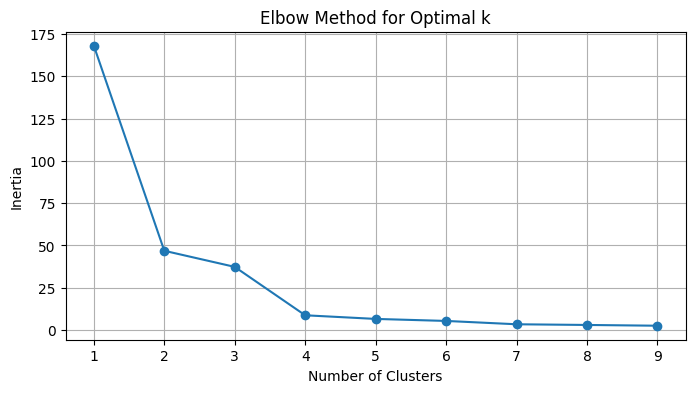

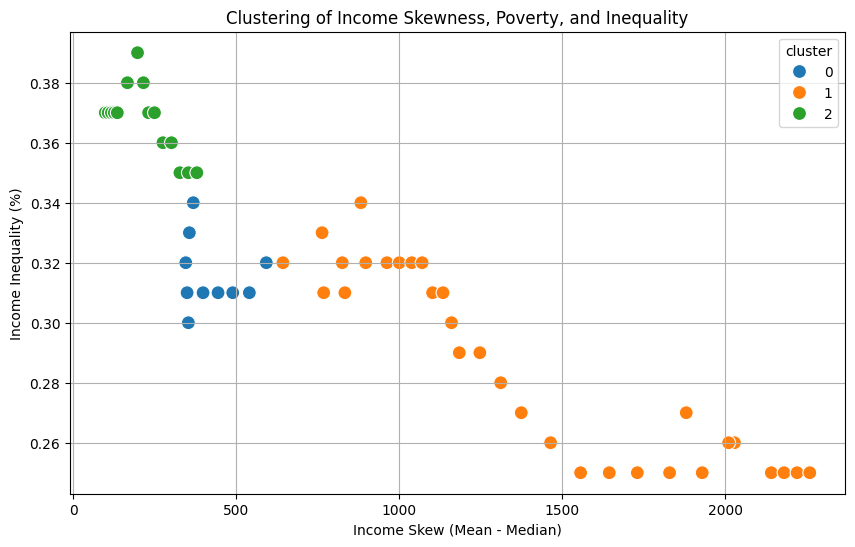


Years with highest poverty & inequality:


,year,income_skew,poverty_relative_national_median_income(%),income_inequality(%)
25,1995,643.0,0.20,0.32
26,1996,763.0,0.20,0.33
27,1997,882.0,0.20,0.34
28,1998,825.0,0.19,0.32
29,1999,768.0,0.19,0.31
30,2000,833.0,0.19,0.31
31,2001,897.0,0.20,0.32
32,2002,962.0,0.20,0.32
33,2003,1000.0,0.20,0.32
34,2004,1038.0,0.20,0.32


In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset
df = national_data

# Select relevant columns for clustering
cols = [
    "year",
    "income_mean_national(RM)",
    "income_median_national(RM)",
    "poverty_relative_national_median_income(%)",
    "income_inequality(%)"
]
df_selected = df[cols].dropna()

# Remove years with zero or invalid income data
df_selected = df_selected[df_selected["income_mean_national(RM)"] > 0]

# Compute income skewness (mean - median)
df_selected["income_skew"] = df_selected["income_mean_national(RM)"] - df_selected["income_median_national(RM)"]

# Prepare features for clustering
features = df_selected[[
    "income_skew",
    "poverty_relative_national_median_income(%)",
    "income_inequality(%)"
]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="income_skew", 
    y="income_inequality(%)", 
    hue="cluster", 
    data=df_selected, 
    palette="tab10",
    s=100
)
plt.title("Clustering of Income Skewness, Poverty, and Inequality")
plt.xlabel("Income Skew (Mean - Median)")
plt.ylabel("Income Inequality (%)")
plt.grid(True)
plt.show()

# Print years in high-poverty, high-inequality cluster
target_cluster = df_selected.groupby("cluster")["poverty_relative_national_median_income(%)"].mean().idxmax()
print("\nYears with highest poverty & inequality:")
df_selected[df_selected["cluster"] == target_cluster][["year", "income_skew", "poverty_relative_national_median_income(%)", "income_inequality(%)"]]

In [468]:
# Output full table with cluster labels
cluster_table = df_selected[[
    "year",
    "income_mean_national(RM)",
    "income_median_national(RM)",
    "income_skew",
    "poverty_relative_national_median_income(%)",
    "income_inequality(%)",
    "cluster"
]].sort_values("cluster").reset_index(drop=True)

# Display the table
print("\nFull Clustering Table:")
cluster_table



Full Clustering Table:


,year,income_mean_national(RM),income_median_national(RM),income_skew,poverty_relative_national_median_income(%),income_inequality(%),cluster
0,1985,1093.0,725.0,368.0,0.00,0.34,0
1,1992,1566.0,1077.0,489.0,0.00,0.31,0
2,1991,1434.0,990.0,444.0,0.00,0.31,0
3,1990,1301.0,903.0,398.0,0.00,0.31,0
4,1989,1169.0,816.0,353.0,0.00,0.30,0
5,1988,1126.0,777.0,349.0,0.00,0.31,0
6,1987,1083.0,738.0,345.0,0.00,0.32,0
7,1994,1869.0,1277.0,592.0,0.00,0.32,0
8,1993,1717.0,1177.0,540.0,0.00,0.31,0
9,1986,1088.0,732.0,356.0,0.00,0.33,0


In [469]:
economic_names = {
    2: "Take-Off (Emerging Tiger Cub)",
    0: "Drive to Maturity (Ascending Tiger)",
    1: "High Mass‑Consumption (Nearly High-Income)"
}

# overwrite your cluster column:
cluster_table['cluster'] = cluster_table['cluster'].map(economic_names)
cluster_table = cluster_table.rename(columns={"cluster": "economic_stage"})
cluster_table = cluster_table[["year","economic_stage"]]
cluster_table

,year,economic_stage
0,1985,Drive to Maturity (Ascending Tiger)
1,1992,Drive to Maturity (Ascending Tiger)
2,1991,Drive to Maturity (Ascending Tiger)
3,1990,Drive to Maturity (Ascending Tiger)
4,1989,Drive to Maturity (Ascending Tiger)
5,1988,Drive to Maturity (Ascending Tiger)
6,1987,Drive to Maturity (Ascending Tiger)
7,1994,Drive to Maturity (Ascending Tiger)
8,1993,Drive to Maturity (Ascending Tiger)
9,1986,Drive to Maturity (Ascending Tiger)


In [470]:

national_data_x = national_data_x.merge(cluster_table, on='year', how='left')
national_data_x.fillna(0)


,year,population_national,gdp_national(RM),gdp_national_per_capita(RM),Inflation(%),labour_force_national,employed_persons_national,unemployed_persons_national,outside_labour_force_national,unemployed_rate_national(%),participation_rate_national(%),income_mean_national(RM),income_median_national(RM),poverty_relative_national_median_income(%),gdp_national_growth_rate(%),gdp_national_per_capita_growth_rate(%),income_median_growth_rate(%),income_inequality(%),economic_stage
0,1970,10881800,7.370968e+10,6.773390e+09,0.02,0,0,0,0,0.00,0.00,264.0,166.0,0.00,0.00,0.00,0.00,0.37,Take-Off (Emerging Tiger Cub)
1,1971,11159700,8.110620e+10,7.265660e+09,0.02,0,0,0,0,0.00,0.00,288.0,181.0,0.00,0.10,0.07,0.09,0.37,Take-Off (Emerging Tiger Cub)
2,1972,11441300,8.872081e+10,7.751699e+09,0.03,0,0,0,0,0.00,0.00,313.0,196.0,0.00,0.09,0.07,0.08,0.37,Take-Off (Emerging Tiger Cub)
3,1973,11719800,9.910210e+10,8.455832e+09,0.11,0,0,0,0,0.00,0.00,338.0,212.0,0.00,0.12,0.09,0.08,0.37,Take-Off (Emerging Tiger Cub)
4,1974,12001300,1.073461e+11,8.941871e+09,0.17,0,0,0,0,0.00,0.00,362.0,227.0,0.00,0.08,0.06,0.07,0.37,Take-Off (Emerging Tiger Cub)
5,1975,12300300,1.082060e+11,8.798552e+09,0.04,0,0,0,0,0.00,0.00,434.0,268.0,0.00,0.01,-0.02,0.18,0.38,Take-Off (Emerging Tiger Cub)
6,1976,12588100,1.207184e+11,9.589923e+09,0.03,0,0,0,0,0.00,0.00,505.0,308.0,0.00,0.12,0.09,0.15,0.39,Take-Off (Emerging Tiger Cub)
7,1977,12901100,1.300777e+11,1.008219e+10,0.05,0,0,0,0,0.00,0.00,563.0,348.0,0.00,0.08,0.05,0.13,0.38,Take-Off (Emerging Tiger Cub)
8,1978,13200200,1.387330e+11,1.050952e+10,0.05,0,0,0,0,0.00,0.00,620.0,389.0,0.00,0.07,0.04,0.12,0.37,Take-Off (Emerging Tiger Cub)
9,1979,13518300,1.517033e+11,1.122358e+10,0.04,0,0,0,0,0.00,0.00,678.0,429.0,0.00,0.09,0.07,0.10,0.37,Take-Off (Emerging Tiger Cub)


In [471]:
national_data_x.dtypes


year                                            int64
population_national                             int64
gdp_national(RM)                              float64
gdp_national_per_capita(RM)                   float64
Inflation(%)                                  float64
labour_force_national                           int64
employed_persons_national                       int64
unemployed_persons_national                     int64
outside_labour_force_national                   int64
unemployed_rate_national(%)                   float64
participation_rate_national(%)                float64
income_mean_national(RM)                      float64
income_median_national(RM)                    float64
poverty_relative_national_median_income(%)    float64
gdp_national_growth_rate(%)                   float64
gdp_national_per_capita_growth_rate(%)        float64
income_median_growth_rate(%)                  float64
income_inequality(%)                          float64
economic_stage              

In [472]:
print(national_data_x.isnull().sum())


year                                          0
population_national                           0
gdp_national(RM)                              0
gdp_national_per_capita(RM)                   0
Inflation(%)                                  0
labour_force_national                         0
employed_persons_national                     0
unemployed_persons_national                   0
outside_labour_force_national                 0
unemployed_rate_national(%)                   0
participation_rate_national(%)                0
income_mean_national(RM)                      0
income_median_national(RM)                    0
poverty_relative_national_median_income(%)    0
gdp_national_growth_rate(%)                   0
gdp_national_per_capita_growth_rate(%)        0
income_median_growth_rate(%)                  0
income_inequality(%)                          0
economic_stage                                3
dtype: int64


In [473]:
national_data_x.to_csv('./clean data/nation_data.csv', index=False)

# State Data Clustering

In [474]:
# population 
# ======================
URL_DATA = './staging/gold/state_data_gold_data.parquet'
state_data = pd.read_parquet(URL_DATA)
state_data

,year,state,population_state,gdp_per_state(RM),labour_force_state,employed_persons_state,unemployed_persons_state,outside_labour_force_state,unemployed_rate_state(%),income_mean_state(RM),...,poverty_relative_state_median_income(%),gdp_per_capita_state(RM),gdp_state_per_capita_growth_rate(%),state_income_median_growth_rate(%),expenditure_median_state_growth_rate(%),survival_income_state(RM),financial_resilience_score,financial_health_status,income_mean_compare_national,income_median_compare_national
0,2016,Johor,3651800,1.166822e+11,1639100,1580600,58500,820700,0.04,6928.0,...,0.14,31952.0,0.05,0.04,0.00,4284.76,-0.0054,High Risk,0,1
1,2017,Johor,3697000,1.235613e+11,1673800,1616700,57100,824400,0.03,7290.0,...,0.14,33422.0,0.05,0.05,0.04,4442.71,0.0029,Stable,1,1
2,2018,Johor,3749400,1.305859e+11,1745100,1693300,51900,788200,0.03,7651.0,...,0.15,34828.0,0.04,0.04,0.04,4601.84,0.0035,Stable,1,1
3,2019,Johor,3761200,1.342259e+11,1805700,1756100,49600,761600,0.03,8013.0,...,0.15,35687.0,0.02,0.04,0.03,4759.79,0.0039,Stable,1,1
4,2020,Johor,4009700,1.280736e+11,1990900,1920500,70300,826900,0.04,7264.0,...,0.14,31941.0,-0.10,-0.11,0.05,4994.36,-0.0111,High Risk,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2021,Kuala Lumpur,1964000,2.198837e+11,1040700,992500,48300,414000,0.05,12526.0,...,0.11,111957.0,0.02,0.06,0.03,7144.40,0.0166,Affluent,1,1
136,2022,Kuala Lumpur,1961200,2.405175e+11,1060300,1019700,40500,397300,0.04,13325.0,...,0.13,122638.0,0.10,0.06,0.03,7345.97,0.0298,Affluent,1,1
137,2023,Kuala Lumpur,2005700,2.493015e+11,1111700,1077900,33900,387200,0.03,13607.0,...,0.13,124297.0,0.01,0.02,0.03,7544.00,0.0377,Affluent,1,1
138,2024,Kuala Lumpur,2067500,2.578562e+11,1127288,1092883,34507,391617,0.03,13889.0,...,0.13,124719.0,0.00,0.02,0.03,7743.21,0.0374,Affluent,1,1


In [475]:
state_data_2025 =state_data[state_data["year"] == 2025]
state_data_2025

,year,state,population_state,gdp_per_state(RM),labour_force_state,employed_persons_state,unemployed_persons_state,outside_labour_force_state,unemployed_rate_state(%),income_mean_state(RM),...,poverty_relative_state_median_income(%),gdp_per_capita_state(RM),gdp_state_per_capita_growth_rate(%),state_income_median_growth_rate(%),expenditure_median_state_growth_rate(%),survival_income_state(RM),financial_resilience_score,financial_health_status,income_mean_compare_national,income_median_compare_national
9,2025,Johor,4205900,1.577554e+11,2140480,2085593,54888,857429,0.03,8995.0,...,0.17,37508.0,0.03,0.02,0.03,6054.06,-0.0015,Stable,1,1
19,2025,Kedah,2228000,5.484017e+10,981988,953768,28215,520661,0.03,5859.0,...,0.10,24614.0,0.02,0.02,0.04,4400.27,-0.0071,High Risk,0,0
29,2025,Kelantan,1907700,2.920801e+10,703149,678505,24744,525663,0.04,5158.0,...,0.12,15311.0,0.02,0.02,0.03,3948.81,-0.0192,High Risk,0,0
39,2025,Melaka,1052500,4.964750e+10,524393,516024,8473,222393,0.02,8507.0,...,0.14,47171.0,0.02,0.02,0.04,6463.09,0.0028,Stable,0,0
49,2025,Negeri Sembilan,1244600,5.478363e+10,570051,551700,18246,290963,0.03,7163.0,...,0.12,44017.0,0.02,0.02,0.03,4997.90,0.0003,Stable,0,0
59,2025,Pahang,1678200,6.881472e+10,757949,742885,15059,406034,0.02,6094.0,...,0.08,41005.0,0.02,0.02,0.03,4584.16,0.0075,Affluent,0,0
69,2025,Perak,2574900,8.740454e+10,1173688,1128600,44983,604046,0.04,6098.0,...,0.14,33945.0,0.03,0.02,0.02,4227.00,-0.0091,High Risk,0,0
79,2025,Perlis,297800,6.590754e+09,134137,128276,5861,83317,0.04,5983.0,...,0.14,22131.0,0.02,0.02,0.02,4206.96,-0.0123,High Risk,0,0
89,2025,Pulau Pinang,1803300,1.254097e+11,952063,931127,20832,380446,0.02,8727.0,...,0.19,69545.0,0.04,0.02,0.04,5912.61,0.0178,Affluent,0,1
99,2025,Sabah,3759600,8.555211e+10,1822278,1684571,137707,772593,0.08,6497.0,...,0.12,22756.0,0.01,0.02,0.04,3654.12,-0.0389,High Risk,0,0


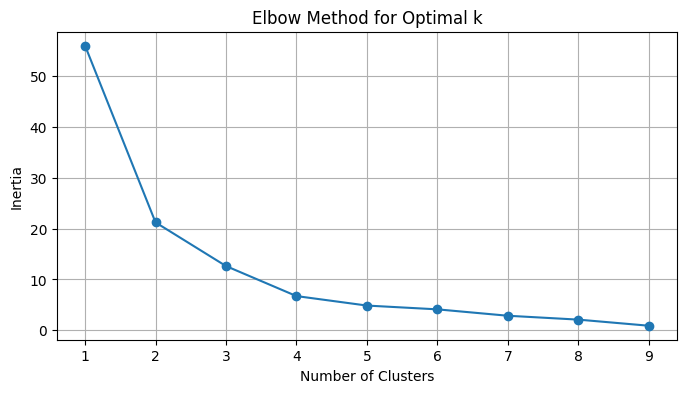

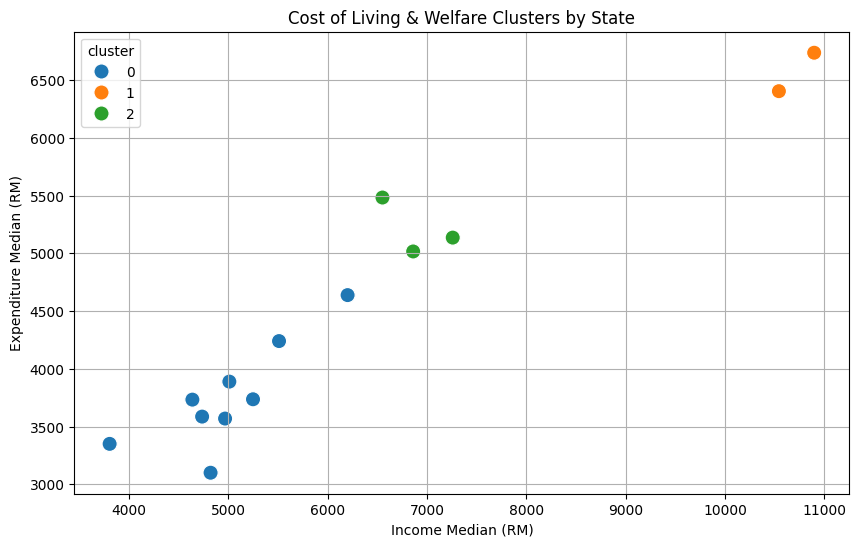


Cluster groupings:


In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset
df = state_data_2025.copy()

# Select relevant columns for cost of living & welfare clustering
cols = [
    "year",
    "state",
    "income_median_state(RM)",
    "expenditure_median_state(RM)",
    "survival_income_state(RM)",
    "poverty_relative_state_median_income(%)"
]

# Drop missing values
df_selected = df[cols].dropna()

# Optional: Remove outliers or rows with zero/negative values
df_selected = df_selected[
    (df_selected["income_median_state(RM)"] > 0) &
    (df_selected["expenditure_median_state(RM)"] > 0) &
    (df_selected["survival_income_state(RM)"] > 0)
]

# Prepare features for clustering
features = df_selected.drop("state", axis=1)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find optimal k using elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Choose optimal k (e.g., 3 based on elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters using 2D projection (e.g. income vs expenditure)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="income_median_state(RM)", 
    y="expenditure_median_state(RM)", 
    hue="cluster", 
    data=df_selected, 
    palette="tab10", 
    s=120
)
plt.title("Cost of Living & Welfare Clusters by State")
plt.xlabel("Income Median (RM)")
plt.ylabel("Expenditure Median (RM)")
plt.grid(True)
plt.show()

# Show results
print("\nCluster groupings:")
cluster_table=df_selected[["year","state", "income_median_state(RM)", "expenditure_median_state(RM)", 
                   "survival_income_state(RM)", "poverty_relative_state_median_income(%)", "cluster"]].sort_values("cluster")


In [477]:
cluster_table

,year,state,income_median_state(RM),expenditure_median_state(RM),survival_income_state(RM),poverty_relative_state_median_income(%),cluster
19,2025,Kedah,4640.0,3733.0,4400.27,0.10,0
29,2025,Kelantan,3807.0,3350.0,3948.81,0.12,0
59,2025,Pahang,5012.0,3889.0,4584.16,0.08,0
49,2025,Negeri Sembilan,5512.0,4240.0,4997.90,0.12,0
69,2025,Perak,4738.0,3586.0,4227.00,0.14,0
79,2025,Perlis,4969.0,3569.0,4206.96,0.14,0
109,2025,Sarawak,5250.0,3736.0,4403.81,0.16,0
99,2025,Sabah,4823.0,3100.0,3654.12,0.12,0
129,2025,Terengganu,6202.0,4638.0,5467.04,0.06,0
119,2025,Selangor,10543.0,6404.0,7548.71,0.16,1


In [478]:
# Cluster	Type	Summary
# 0	Balanced or lower-income states	Modest income and spending, low to moderate poverty
# 1	High-income urban centers	High income but also high living cost and non-negligible poverty
# 2	Economically growing mid-tier states

economic_names = {
    2: "Economically growing mid-tier states",
    0: "Balanced or lower-income states",
    1: "High-income urban centers"
}

# overwrite your cluster column:
cluster_table['cluster'] = cluster_table['cluster'].map(economic_names)
cluster_table = cluster_table.rename(columns={"cluster": "living_cost_cluster"})
cluster_table = cluster_table[["year","state", "living_cost_cluster"]]
cluster_table

,year,state,living_cost_cluster
19,2025,Kedah,Balanced or lower-income states
29,2025,Kelantan,Balanced or lower-income states
59,2025,Pahang,Balanced or lower-income states
49,2025,Negeri Sembilan,Balanced or lower-income states
69,2025,Perak,Balanced or lower-income states
79,2025,Perlis,Balanced or lower-income states
109,2025,Sarawak,Balanced or lower-income states
99,2025,Sabah,Balanced or lower-income states
129,2025,Terengganu,Balanced or lower-income states
119,2025,Selangor,High-income urban centers


In [479]:

state_data_x = state_data.merge(cluster_table, on=['year','state'], how='left')
state_data_x.fillna(0)
state_data_x


,year,state,population_state,gdp_per_state(RM),labour_force_state,employed_persons_state,unemployed_persons_state,outside_labour_force_state,unemployed_rate_state(%),income_mean_state(RM),...,gdp_per_capita_state(RM),gdp_state_per_capita_growth_rate(%),state_income_median_growth_rate(%),expenditure_median_state_growth_rate(%),survival_income_state(RM),financial_resilience_score,financial_health_status,income_mean_compare_national,income_median_compare_national,living_cost_cluster
0,2016,Johor,3651800,1.166822e+11,1639100,1580600,58500,820700,0.04,6928.0,...,31952.0,0.05,0.04,0.00,4284.76,-0.0054,High Risk,0,1,NaN
1,2017,Johor,3697000,1.235613e+11,1673800,1616700,57100,824400,0.03,7290.0,...,33422.0,0.05,0.05,0.04,4442.71,0.0029,Stable,1,1,NaN
2,2018,Johor,3749400,1.305859e+11,1745100,1693300,51900,788200,0.03,7651.0,...,34828.0,0.04,0.04,0.04,4601.84,0.0035,Stable,1,1,NaN
3,2019,Johor,3761200,1.342259e+11,1805700,1756100,49600,761600,0.03,8013.0,...,35687.0,0.02,0.04,0.03,4759.79,0.0039,Stable,1,1,NaN
4,2020,Johor,4009700,1.280736e+11,1990900,1920500,70300,826900,0.04,7264.0,...,31941.0,-0.10,-0.11,0.05,4994.36,-0.0111,High Risk,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2021,Kuala Lumpur,1964000,2.198837e+11,1040700,992500,48300,414000,0.05,12526.0,...,111957.0,0.02,0.06,0.03,7144.40,0.0166,Affluent,1,1,NaN
136,2022,Kuala Lumpur,1961200,2.405175e+11,1060300,1019700,40500,397300,0.04,13325.0,...,122638.0,0.10,0.06,0.03,7345.97,0.0298,Affluent,1,1,NaN
137,2023,Kuala Lumpur,2005700,2.493015e+11,1111700,1077900,33900,387200,0.03,13607.0,...,124297.0,0.01,0.02,0.03,7544.00,0.0377,Affluent,1,1,NaN
138,2024,Kuala Lumpur,2067500,2.578562e+11,1127288,1092883,34507,391617,0.03,13889.0,...,124719.0,0.00,0.02,0.03,7743.21,0.0374,Affluent,1,1,NaN


In [480]:
test = state_data_x[state_data_x["year"] == 2024]
test

,year,state,population_state,gdp_per_state(RM),labour_force_state,employed_persons_state,unemployed_persons_state,outside_labour_force_state,unemployed_rate_state(%),income_mean_state(RM),...,gdp_per_capita_state(RM),gdp_state_per_capita_growth_rate(%),state_income_median_growth_rate(%),expenditure_median_state_growth_rate(%),survival_income_state(RM),financial_resilience_score,financial_health_status,income_mean_compare_national,income_median_compare_national,living_cost_cluster
8,2024,Johor,4184399,1.529801e+11,2105890,2051746,54144,845515,0.03,8835.0,...,36560.0,0.01,0.02,0.03,5858.39,-0.0009,Stable,1,1,NaN
18,2024,Kedah,2217100,5.331111e+10,968544,940634,27907,514580,0.03,5756.0,...,24045.0,0.02,0.02,0.04,4229.35,-0.0064,High Risk,0,0,NaN
28,2024,Kelantan,1887900,2.842798e+10,694224,669802,24522,517832,0.04,5067.0,...,15058.0,0.01,0.02,0.03,3829.76,-0.0186,High Risk,0,0,NaN
38,2024,Melaka,1046700,4.829047e+10,516246,507912,8437,219746,0.02,8357.0,...,46136.0,0.01,0.02,0.04,6219.08,0.0038,Stable,0,0,NaN
48,2024,Negeri Sembilan,1239500,5.332384e+10,561976,543900,17973,287232,0.03,7038.0,...,43020.0,0.02,0.02,0.03,4851.73,0.0006,Stable,0,0,NaN
58,2024,Pahang,1667700,6.687822e+10,746824,731893,14929,399817,0.02,5988.0,...,40102.0,0.01,0.02,0.03,4436.81,0.0079,Affluent,0,0,NaN
68,2024,Perak,2569400,8.498164e+10,1161244,1116400,44741,598373,0.04,5992.0,...,33075.0,0.02,0.02,0.02,4131.52,-0.0091,High Risk,0,0,NaN
78,2024,Perlis,296800,6.466966e+09,132368,126588,5780,82259,0.04,5876.0,...,21789.0,0.01,0.02,0.02,4123.27,-0.0123,High Risk,0,0,NaN
88,2024,Pulau Pinang,1800500,1.206833e+11,939132,918363,20666,376773,0.02,8574.0,...,67028.0,0.02,0.02,0.04,5702.79,0.0179,Affluent,0,1,NaN
98,2024,Sabah,3742000,8.437451e+10,1788139,1653385,134754,760146,0.08,6389.0,...,22548.0,-0.03,0.02,0.04,3524.46,-0.0383,High Risk,0,0,NaN


In [481]:
state_data_x.dtypes

year                                         int32
state                                       object
population_state                             int64
gdp_per_state(RM)                          float64
labour_force_state                           int64
employed_persons_state                       int64
unemployed_persons_state                     int64
outside_labour_force_state                   int64
unemployed_rate_state(%)                   float64
income_mean_state(RM)                      float64
income_median_state(RM)                    float64
expenditure_mean_state(RM)                 float64
expenditure_median_state(RM)               float64
poverty_relative_state_median_income(%)    float64
gdp_per_capita_state(RM)                   float64
gdp_state_per_capita_growth_rate(%)        float64
state_income_median_growth_rate(%)         float64
expenditure_median_state_growth_rate(%)    float64
survival_income_state(RM)                  float64
financial_resilience_score     

In [482]:
state_data_x.fillna(0, inplace=True)
print(state_data_x.isnull().sum())

year                                       0
state                                      0
population_state                           0
gdp_per_state(RM)                          0
labour_force_state                         0
employed_persons_state                     0
unemployed_persons_state                   0
outside_labour_force_state                 0
unemployed_rate_state(%)                   0
income_mean_state(RM)                      0
income_median_state(RM)                    0
expenditure_mean_state(RM)                 0
expenditure_median_state(RM)               0
poverty_relative_state_median_income(%)    0
gdp_per_capita_state(RM)                   0
gdp_state_per_capita_growth_rate(%)        0
state_income_median_growth_rate(%)         0
expenditure_median_state_growth_rate(%)    0
survival_income_state(RM)                  0
financial_resilience_score                 0
financial_health_status                    0
income_mean_compare_national               0
income_med

In [483]:
state_data_x

,year,state,population_state,gdp_per_state(RM),labour_force_state,employed_persons_state,unemployed_persons_state,outside_labour_force_state,unemployed_rate_state(%),income_mean_state(RM),...,gdp_per_capita_state(RM),gdp_state_per_capita_growth_rate(%),state_income_median_growth_rate(%),expenditure_median_state_growth_rate(%),survival_income_state(RM),financial_resilience_score,financial_health_status,income_mean_compare_national,income_median_compare_national,living_cost_cluster
0,2016,Johor,3651800,1.166822e+11,1639100,1580600,58500,820700,0.04,6928.0,...,31952.0,0.05,0.04,0.00,4284.76,-0.0054,High Risk,0,1,0
1,2017,Johor,3697000,1.235613e+11,1673800,1616700,57100,824400,0.03,7290.0,...,33422.0,0.05,0.05,0.04,4442.71,0.0029,Stable,1,1,0
2,2018,Johor,3749400,1.305859e+11,1745100,1693300,51900,788200,0.03,7651.0,...,34828.0,0.04,0.04,0.04,4601.84,0.0035,Stable,1,1,0
3,2019,Johor,3761200,1.342259e+11,1805700,1756100,49600,761600,0.03,8013.0,...,35687.0,0.02,0.04,0.03,4759.79,0.0039,Stable,1,1,0
4,2020,Johor,4009700,1.280736e+11,1990900,1920500,70300,826900,0.04,7264.0,...,31941.0,-0.10,-0.11,0.05,4994.36,-0.0111,High Risk,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2021,Kuala Lumpur,1964000,2.198837e+11,1040700,992500,48300,414000,0.05,12526.0,...,111957.0,0.02,0.06,0.03,7144.40,0.0166,Affluent,1,1,0
136,2022,Kuala Lumpur,1961200,2.405175e+11,1060300,1019700,40500,397300,0.04,13325.0,...,122638.0,0.10,0.06,0.03,7345.97,0.0298,Affluent,1,1,0
137,2023,Kuala Lumpur,2005700,2.493015e+11,1111700,1077900,33900,387200,0.03,13607.0,...,124297.0,0.01,0.02,0.03,7544.00,0.0377,Affluent,1,1,0
138,2024,Kuala Lumpur,2067500,2.578562e+11,1127288,1092883,34507,391617,0.03,13889.0,...,124719.0,0.00,0.02,0.03,7743.21,0.0374,Affluent,1,1,0


# Saving

In [484]:
state_data_x.to_csv('./clean data/state_data.csv', index=False)

# state_data_x